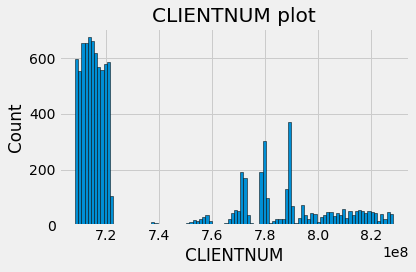

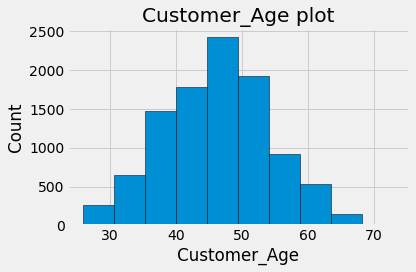

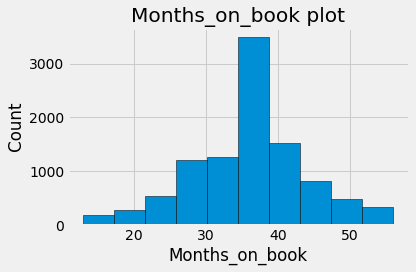

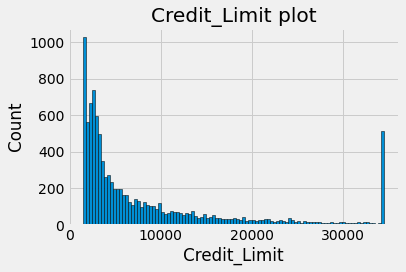

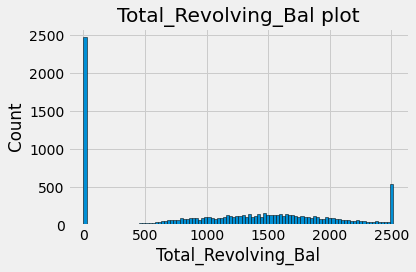

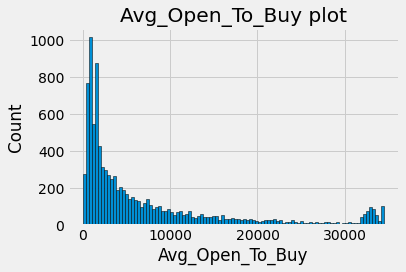

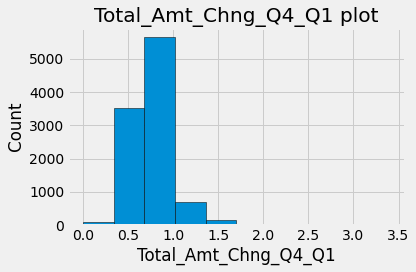

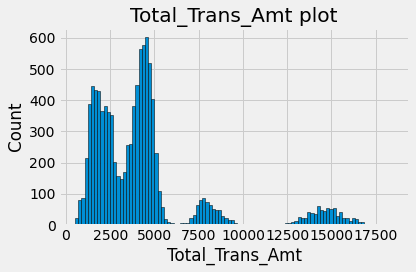

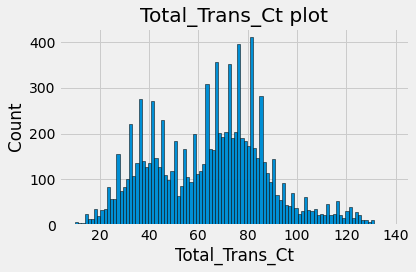

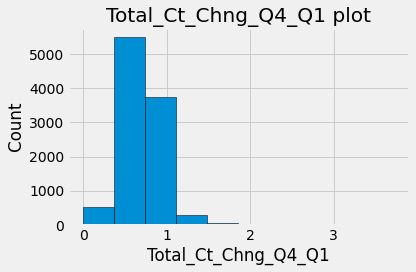

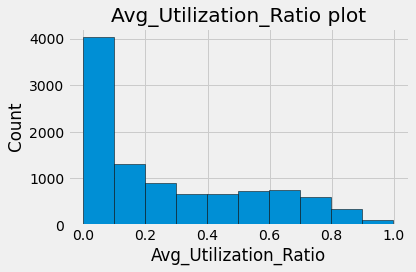

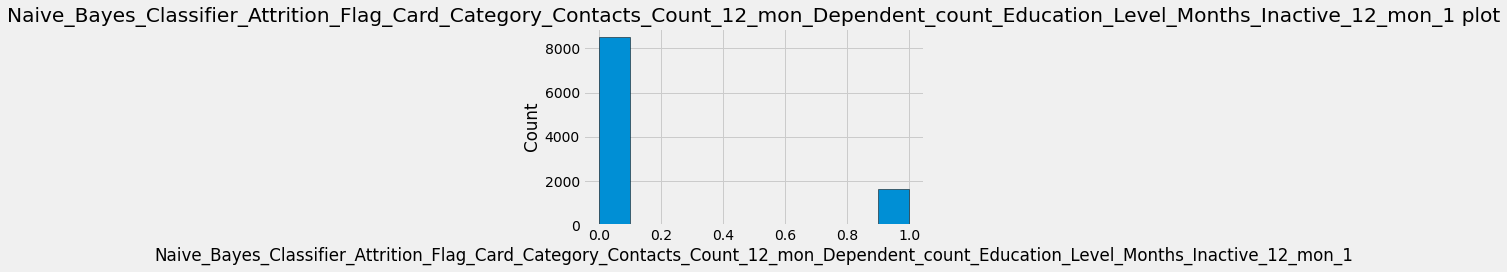

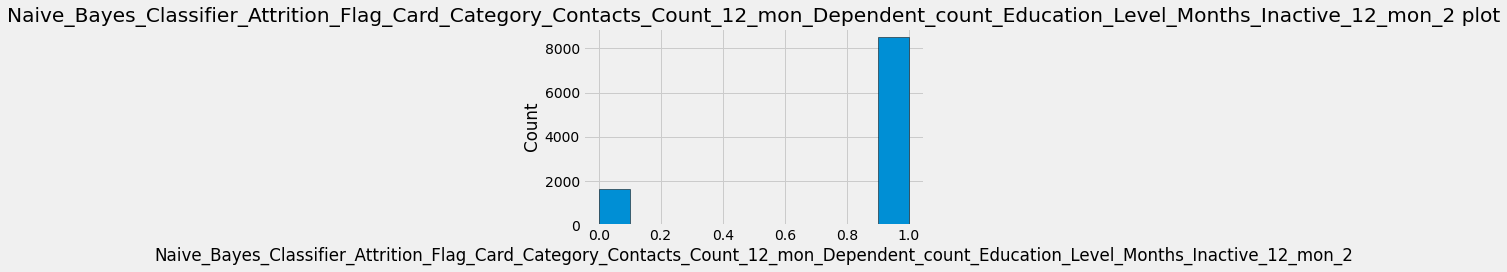

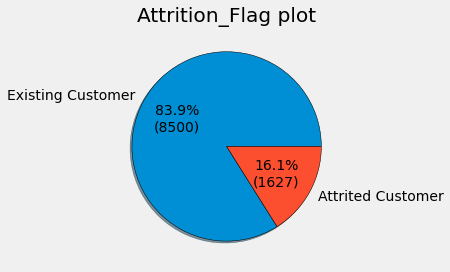

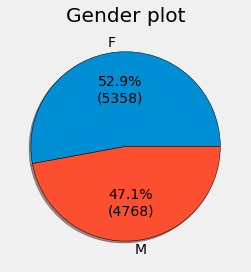

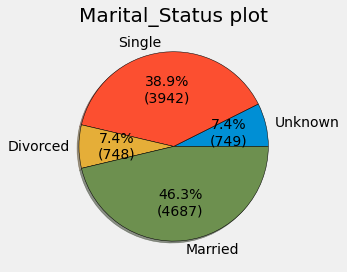

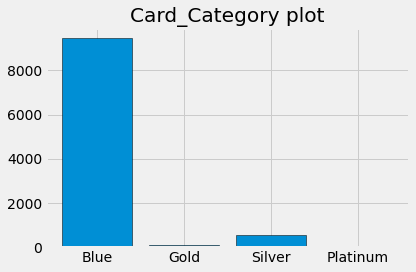

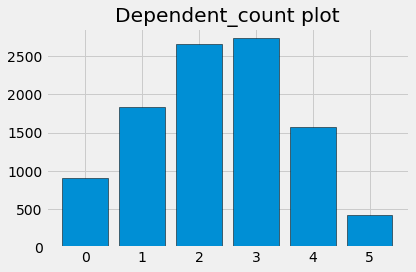

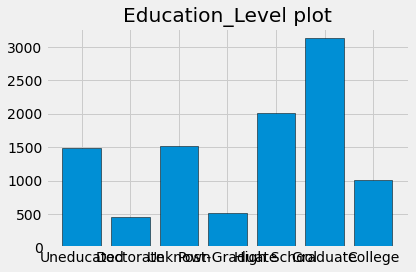

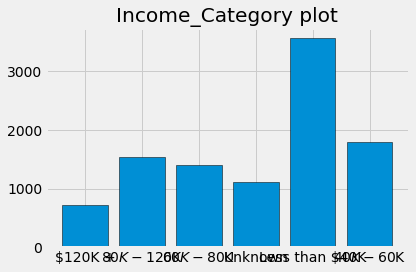

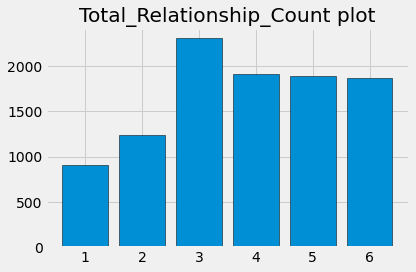

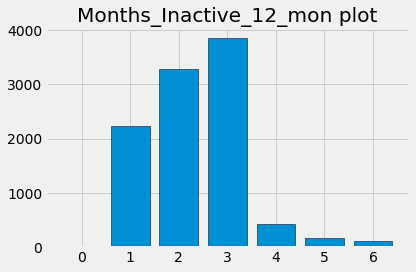

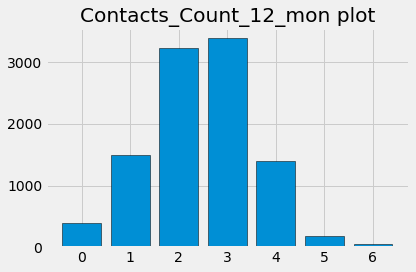


STATISTICS CALCULATION


Mean:
----------------------------------------------------
CLIENTNUM :  739177606.3336625
Customer_Age :  46.32596030413745
Months_on_book :  35.928409203120374
Credit_Limit :  8631.953698034955
Total_Revolving_Bal :  1162.8140614199665
Avg_Open_To_Buy :  7469.139636614989
Total_Amt_Chng_Q4_Q1 :  0.7599406536980349
Total_Trans_Amt :  4404.086303939963
Total_Trans_Ct :  64.85869457884863
Total_Ct_Chng_Q4_Q1 :  0.7122223758269972
Avg_Utilization_Ratio :  0.2748935518909845
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 :  0.1599974639787795
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 :  0.8400025708403278
----------------------------------------------------


Standard deviation:
----------------------------------------------------
CLIENTNUM :  36903783.45023115
Customer_Age :  8.016814032549028

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

tav = {
    "numeric": ["CLIENTNUM", "Customer_Age", "Months_on_book", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", 
                "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
    "categorical": ["Attrition_Flag", "Gender", "Marital_Status", "Card_Category",],
    "ordinal": ["Dependent_count", "Education_Level", "Income_Category", "Total_Relationship_Count", 
                "Months_Inactive_12_mon", "Contacts_Count_12_mon"]
}

def hist_plot(name):
    plt.style.use("fivethirtyeight")

    slices = list(data[name])
    mx = max(slices)
    mn = min(slices)
    bins = []
    if mx == round(mx):
        if mx < 10:
            step = 1
            for i in range(mx):
                bins.append(mn + i * step)
        elif mx < 100:
            step = (mx-mn)/10
            for i in range(11):
                bins.append(mn + i * step)
        else:
            step = (mx-mn)/100
            for i in range(101):
                bins.append(mn + i * step)
    else:
        step = (mx - mn) / 10
        for i in range(11):
            bins.append(mn + i * step)

    plt.hist(slices, bins=bins, edgecolor='black')

    plt.xlabel(name)
    plt.ylabel("Count")

    plt.title(name + " plot")
    plt.tight_layout()
    plt.show()

def category_hist_plot(tav, name):
    for i in range(len(tav[name])):
        column = tav[name][i]
        hist_plot(column)

def percent_and_values(pct, values):
    count = int(pct/100.*np.sum(values))
    return "{:.1f}%\n({:d})".format(pct, count)

def pie_plot(name):
    plt.style.use("fivethirtyeight")

    if name == "Card_Category":
        bar_plot("Card_Category")
        return
    else:
        slices = []
        labels = list(set(data[name]))
        for sector in labels:
            slices.append(list(data[name]).count(sector))

        plt.pie(slices, labels=labels, shadow=True,
                autopct=lambda pct: percent_and_values(pct, slices),
                wedgeprops={'edgecolor': 'black'})

    plt.title(name+" plot")
    plt.tight_layout()
    plt.show()

def category_pie_plot(tav, name):
    for i in range(len(tav[name])):
        column = tav[name][i]
        pie_plot(column)

def bar_plot(name):
    plt.style.use("fivethirtyeight")

    slices = list(set(data[name]))
    count = []
    for sector in slices:
        count.append(list(data[name]).count(sector))
    plt.bar(slices, count, edgecolor='black')

    plt.title(name + " plot")
    plt.tight_layout()
    plt.show()

def category_bar_plot(tav, name):
    for i in range(len(tav[name])):
        column = tav[name][i]
        bar_plot(column)

def visualization():
    category_hist_plot(tav, 'numeric')
    category_pie_plot(tav, 'categorical')
    category_bar_plot(tav, 'ordinal')

def mean():
    for col in tav['numeric']:
        print(col,': ',data[col].mean())

def std():
    for col in tav['numeric']:
        print(col, ': ', data[col].std())

def corr_mtx():
    print(data.corr())

def frequency():
    for col in tav['numeric']:
        print(col,':')
        print(data[col].value_counts())
        print()
    for col in tav['categorical']:
        print(col,':')
        print(data[col].value_counts())
        print()
    for col in tav['ordinal']:
        print(col,':')
        print(data[col].value_counts())
        print()

def calc_stats():
    print("\nSTATISTICS CALCULATION")
    print("====================================================")
    print("\n\nMean:")
    print("----------------------------------------------------")
    mean()
    print("----------------------------------------------------")
    print("\n\nStandard deviation:")
    print("----------------------------------------------------")
    std()
    print("----------------------------------------------------")
    print("\n\nCorrelation matrix:")
    print("----------------------------------------------------")
    corr_mtx()
    print("----------------------------------------------------")
    print("\n\nFrequency:")
    print("----------------------------------------------------")
    frequency()
    print("----------------------------------------------------")
    print("====================================================")

data = pd.read_csv("BankChurners.csv")

visualization()
calc_stats()